## Final Project Submission

* Student name: Charlotte Basch
* Student pace: self paced / part time / <strong> full time </strong>
* Scheduled project review date/time: 9/5/2020, 4pm
* Instructor name: James Irving 
* Blog post URL: https://charsarb.github.io/data_cleaning


# Introduction

This project uses data from King's County, Washington to create a regression model for predicting houses. The goal of this project is to help homeowners maximizes their profit when selling their homes. I wanted to create a model with as much accuracy as possible. I initially attempted to refine my model using variance inflation factor to decide which variables to eliminate. However the identified correlated variables did not match what was found using a heatmap to display the correlations between the variables. There were also issues meeting the assumptions. Thus using r-squared values became the primary method for determining the model's strength.   

# Data Cleaning

In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import r2_score
import calendar
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#import data
data = pd.read_csv("kc_house_data.csv")
display(data.head())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,nan,0.000,3,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.0,1933,nan,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [3]:
#View the data types of each column and number of rows and columns in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [70]:
#Look the different descriptive statistics for each column
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,month_sold,house_age,renovated,has_basement
count,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000,21143.000
mean,540510.727,3.373,2.116,2080.921,15087.138,1.494,0.007,3.410,7.658,1789.069,98077.869,1987.271,12738.942,6.575,43.301,0.034,0.393
std,368075.064,0.925,0.769,918.548,41209.200,0.539,0.082,0.650,1.174,828.410,53.536,685.670,27169.274,3.115,29.323,0.182,0.489
min,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,1.000,3.000,370.000,98001.000,399.000,651.000,1.000,0.000,0.000,0.000
25%,322000.000,3.000,1.750,1430.000,5043.000,1.000,0.000,3.000,7.000,1200.000,98033.000,1490.000,5100.000,4.000,18.000,0.000,0.000
50%,450000.000,3.000,2.250,1910.000,7620.000,1.500,0.000,3.000,7.000,1560.000,98065.000,1840.000,7626.000,6.000,40.000,0.000,0.000
75%,645000.000,4.000,2.500,2550.000,10695.500,2.000,0.000,4.000,8.000,2210.000,98117.000,2360.000,10087.000,9.000,63.000,0.000,1.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,5.000,13.000,9410.000,98199.000,6210.000,871200.000,12.000,115.000,1.000,1.000


In [4]:
#Look for any suspicious values and count the number of unique
#values for each column
for col in data.columns:
    val_counts = data[col].value_counts()
    index_list = []
    value_list = []
    print(f"Number of unique {col} values: {data[col].nunique()}")
    for index, value in val_counts.items():
        index_list.append(index)
        value_list.append(value)
    df = pd.DataFrame({col: index_list, "count": value_list})
    df = df.sort_values(by=["count"], ascending=False)
    display(df.head())

Number of unique id values: 21420


,id,count
0,795000620,3
89,6141100320,2
113,9238500040,2
114,3935900232,2
115,6791200120,2


Number of unique date values: 372


,date,count
0,6/23/2014,142
2,6/26/2014,131
1,6/25/2014,131
3,7/8/2014,127
4,4/27/2015,126


Number of unique price values: 3622


,price,count
0,350000.000,172
1,450000.000,172
2,550000.000,159
3,500000.000,152
4,425000.000,150


Number of unique bedrooms values: 12


,bedrooms,count
0,3,9824
1,4,6882
2,2,2760
3,5,1601
4,6,272


Number of unique bathrooms values: 29


,bathrooms,count
0,2.500,5377
1,1.000,3851
2,1.750,3048
3,2.250,2047
4,2.000,1930


Number of unique sqft_living values: 1034


,sqft_living,count
0,1300,138
1,1400,135
2,1440,133
3,1660,129
4,1010,129


Number of unique sqft_lot values: 9776


,sqft_lot,count
0,5000,358
1,6000,290
2,4000,251
3,7200,220
4,7500,119


Number of unique floors values: 6


,floors,count
0,1.000,10673
1,2.000,8235
2,1.500,1910
3,3.000,611
4,2.500,161


Number of unique waterfront values: 2


,waterfront,count
0,0.000,19075
1,1.000,146


Number of unique view values: 5


,view,count
0,0.000,19422
1,2.000,957
2,3.000,508
3,1.000,330
4,4.000,317


Number of unique condition values: 5


,condition,count
0,3,14020
1,4,5677
2,5,1701
3,2,170
4,1,29


Number of unique grade values: 11


,grade,count
0,7,8974
1,8,6065
2,9,2615
3,6,2038
4,10,1134


Number of unique sqft_above values: 942


,sqft_above,count
0,1300,212
1,1010,210
2,1200,206
3,1220,192
4,1140,184


Number of unique sqft_basement values: 304


,sqft_basement,count
0,0.0,12826
1,?,454
2,600.0,217
3,500.0,209
4,700.0,208


Number of unique yr_built values: 116


,yr_built,count
0,2014,559
1,2006,453
2,2005,450
3,2004,433
4,2003,420


Number of unique yr_renovated values: 70


,yr_renovated,count
0,0.000,17011
1,2014.000,73
2,2003.000,31
3,2013.000,31
4,2007.000,30


Number of unique zipcode values: 70


,zipcode,count
0,98103,602
1,98038,589
2,98115,583
3,98052,574
4,98117,553


Number of unique lat values: 5033


,lat,count
0,47.662,17
2,47.532,17
3,47.685,17
1,47.549,17
4,47.671,16


Number of unique long values: 751


,long,count
0,-122.290,115
1,-122.300,111
2,-122.362,104
3,-122.291,100
4,-122.372,99


Number of unique sqft_living15 values: 777


,sqft_living15,count
0,1540,197
1,1440,195
2,1560,192
3,1500,180
4,1460,169


Number of unique sqft_lot15 values: 8682


,sqft_lot15,count
0,5000,427
1,4000,356
2,6000,288
3,7200,210
4,4800,145


In [5]:
#Given that the sqft_basement variable has a ? in its data, replace it with null values
data = data.replace("?", np.nan)
#Since we have zipcode to indicate location, drop latitude and longitude 
#The number of times the house is viewed is not something a buyer or seller can control or sometimes even access
#so we will drop it
#id will also not be a predictor so drop it as well 
data = data.drop(columns=["lat", "long", "id", "view"])

## What should we do with null values?

In [6]:
#See how many null values are in each column
data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#Check the percentage of null values for each column
#An accepted cutoff for dropping null rows is if less than 5% is missing
#If a large amount of data is missing, the column can be dropped
def find_percent_null(df):
    null_nums = df.isnull().sum()
    total_rows = df.shape[0]
    for index, value in null_nums.items():
        if value != 0:
            percent_missing = round((value/total_rows)*100, 2)
            print(f"{percent_missing}% of {index} values are missing.")

#It appears we can drop the missing values for view and sqft_basement but cannot drop any of the columns
find_percent_null(data)

11.0% of waterfront values are missing.
2.1% of sqft_basement values are missing.
17.79% of yr_renovated values are missing.


In [8]:
def change_col_type(df, col_list, data_type):
    for col in col_list:
        df[col] = df[col].astype(data_type)

In [9]:
#Drop the rows where view is missing
data = data.dropna(subset=["sqft_basement"])
#find_percent_null(data)

#change the data type of sqft_basement
change_col_type(data, ["sqft_basement"], "float")
#find_percent_null(data)

#Replace the yr_renovated and waterfront with most common values
data["waterfront"] = data["waterfront"].fillna(data["waterfront"].mode()[0])
data["yr_renovated"] = data["yr_renovated"].fillna(data["yr_renovated"].mode()[0])
#find_percent_null(data)

In [10]:
#Make columns to indicate the year each house was sold
dates = list(data["date"].map(lambda x: x.split("/")))
months = list(map(lambda date: date[0], dates))
years = list(map(lambda date: date[2], dates))
data["year_sold"] = years
data["month_sold"] = months
#Change the type of the columns from string to integer
change_col_type(data, ["year_sold", "month_sold"], "int")

#get rid of the date column now that we have obtained the information we want
data = data.drop(columns=["date"])

In [11]:
#create columns for house age when purchased
data["house_age"] = data["year_sold"] - data["yr_built"]
#Some of the houses are listed as purchased before built but whether the house is 
#built before or after purchase it is still new, so change -1 values to 0
data["house_age"] = data["house_age"].replace(-1,0)

#Since most of the houses have not been renovated, simply track if they have or have not
data["renovated"] = data["yr_renovated"].map(lambda x: 0 if x==0 else 1)

#Likewise most of the houses do not have basements so view houses in terms of having or not having basements
data["has_basement"] = data["sqft_basement"].map(lambda x: 0 if x==0 else 1)

#Drop yr_built, year_sold, sqft_basememnt, and yr_renovated now that they have been replaced with new colummns 
data = data.drop(columns=["yr_built", "yr_renovated", "sqft_basement", "year_sold"])

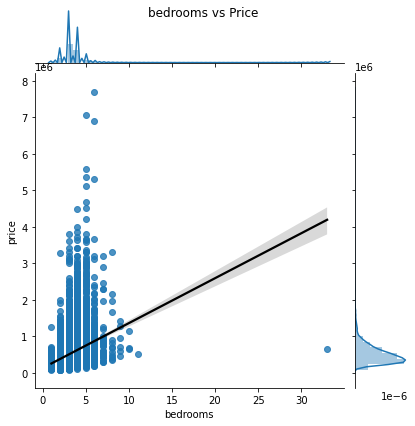

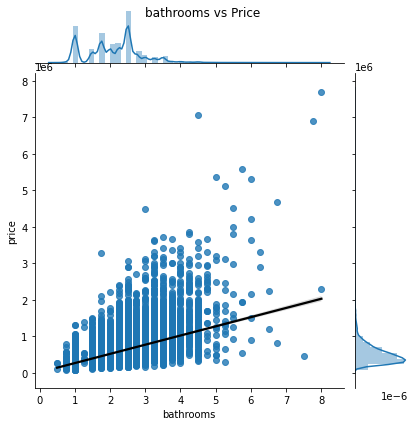

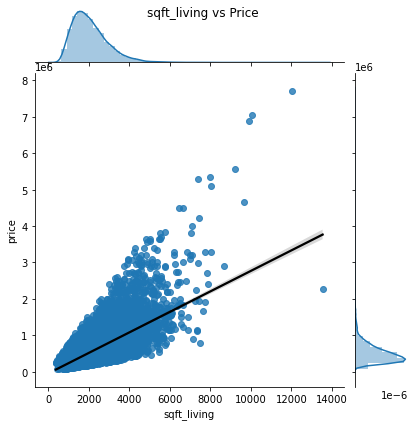

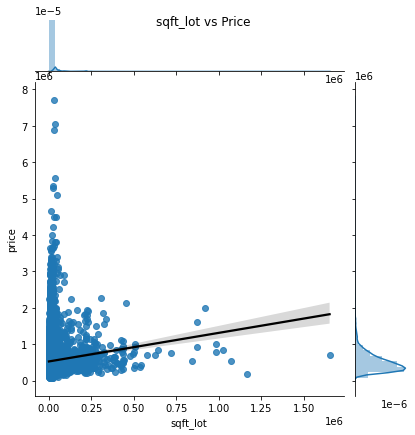

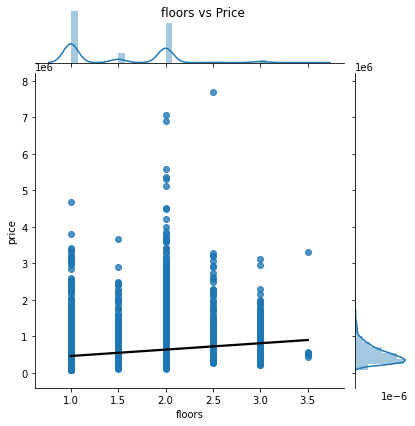

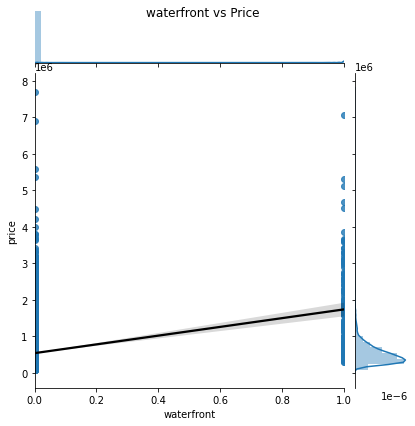

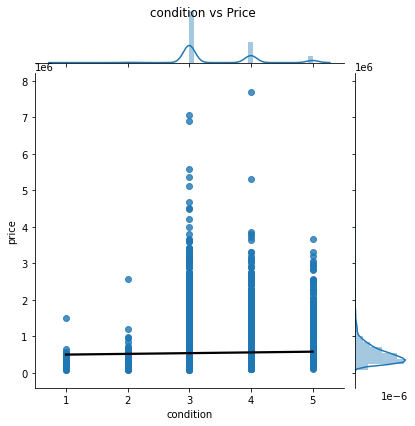

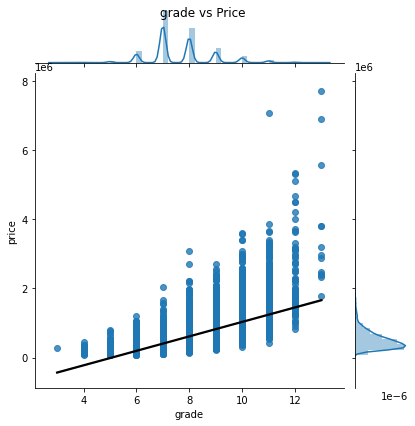

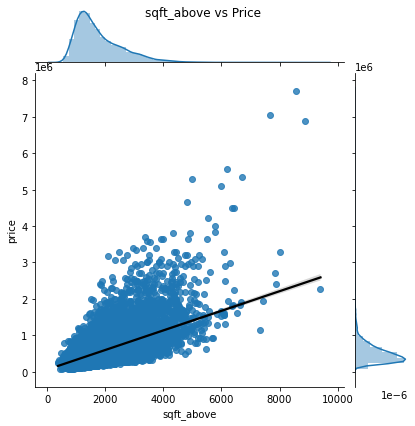

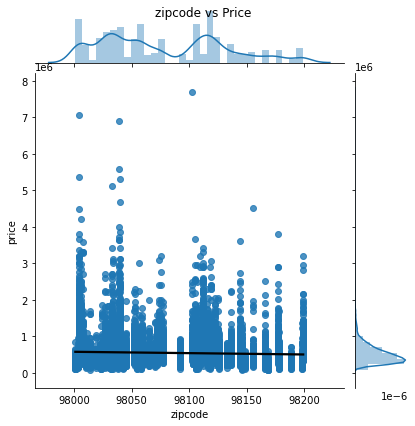

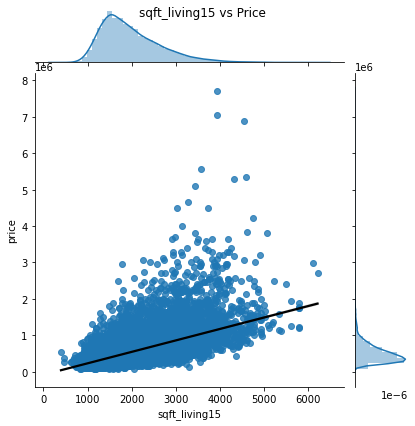

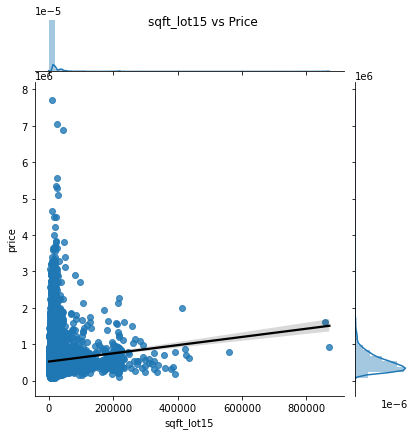

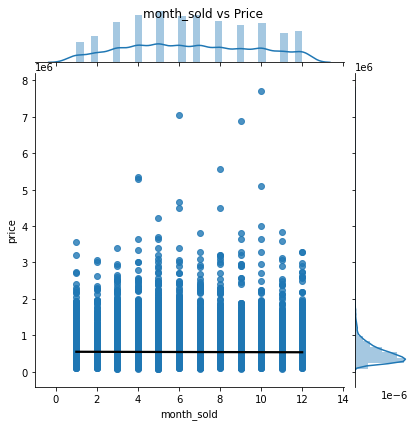

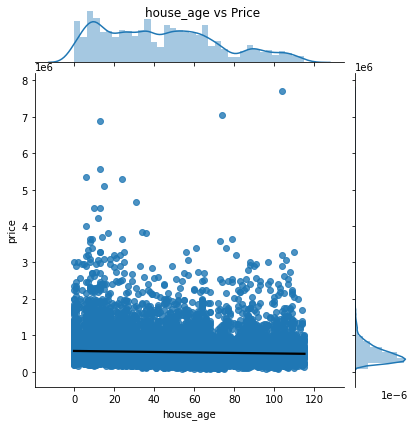

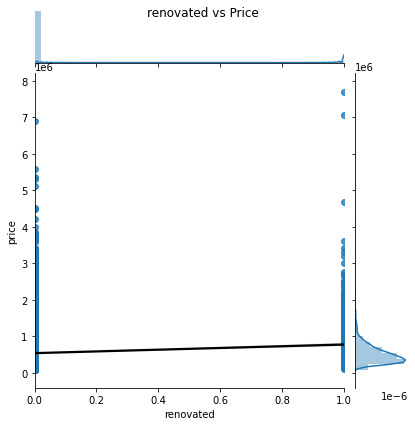

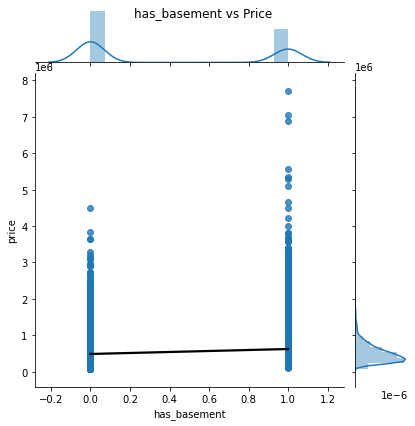

In [12]:
#See each variable plotted against price to check the linearity assumption
for col in data.columns:
    if col != "price":
        g = sns.jointplot(col, "price", data=data, kind="reg", line_kws = {"color": 'black'})
        g.fig.suptitle(f"{col} vs Price")
# #It does not appear all of the relationships are linear but for now we will leave all variables in the model
#In addition while month does not appear to have a relationship to price, we will leave it in for now
#We can see that categories such as whether the house is on the waterfront or the zipcode fall
#into their own seperate categories

In [13]:
#Change categorical data from numerical to string to aid in our later analyses
categorical_cols = ["waterfront", "zipcode", "renovated", "has_basement"]

#Create a new dataframe with only predictors
predictors = data.copy().drop(columns=["price"])

#Seperate out the numeric columns
qual_predictors = predictors.copy().drop(columns=categorical_cols)

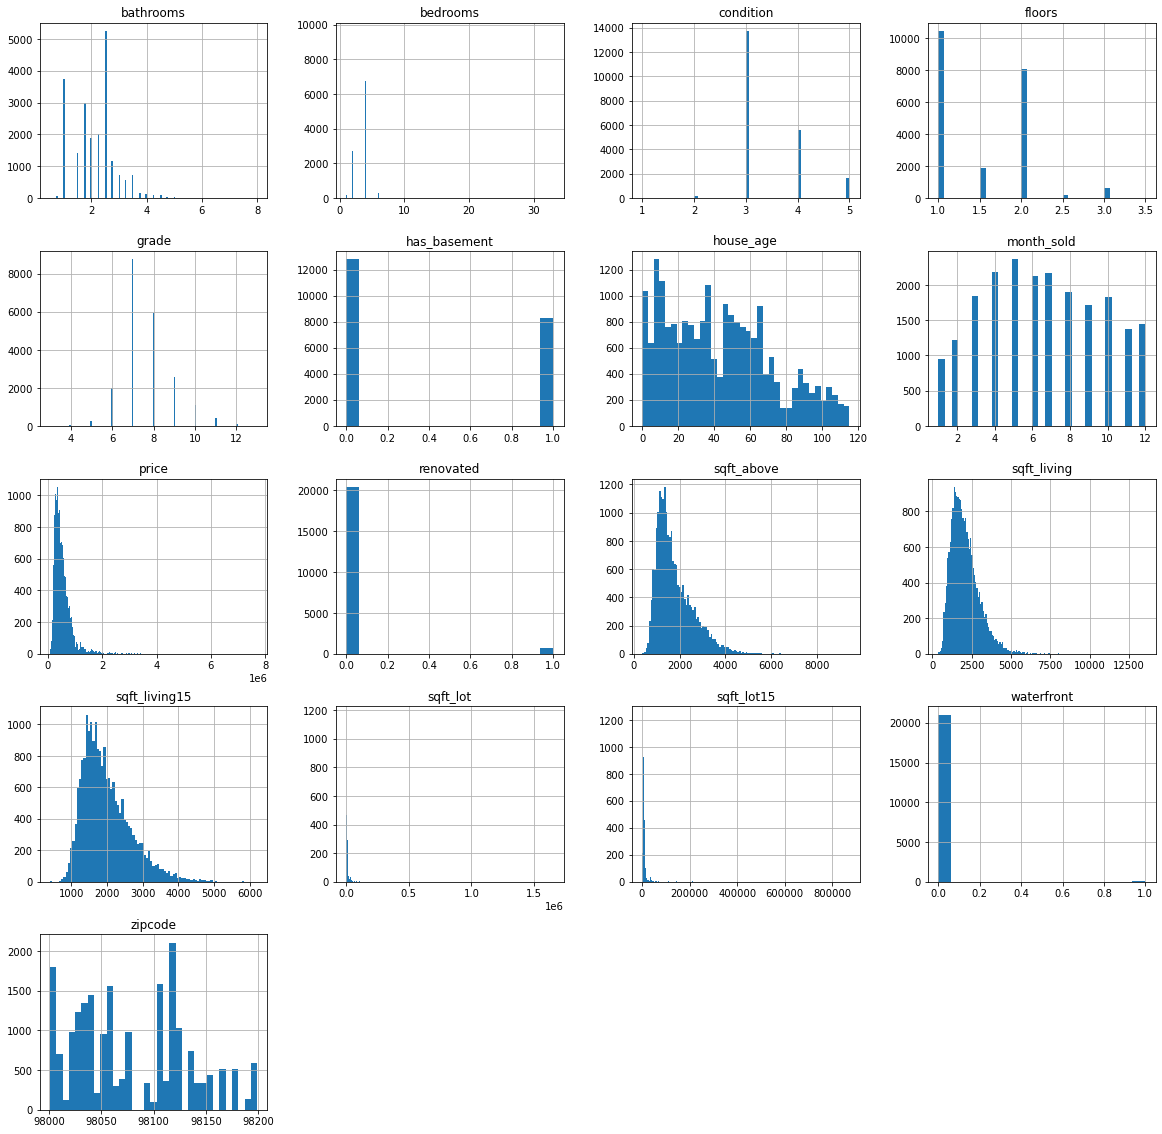

In [14]:
#Look at the distribution of each of our variables
#While they are not required to be normal, this may indicate the data might need to be transformed
data.hist(figsize=(20,20), bins="auto");

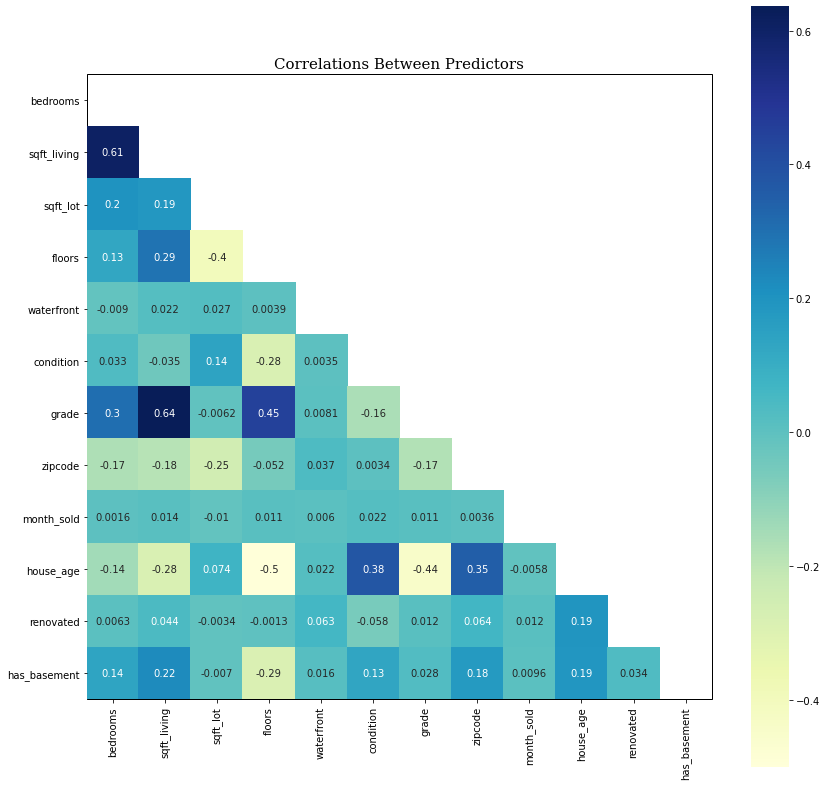

In [62]:
#Create a heatmap to display the correlations and check for multicollinearity 
#assuming any correlation above .65 is highly correlated, and correlations above .5 should be examined
#However for this inital model we will leave in all variables to get a general sense of an inital model
def create_heatmap(predictors):
    corr = predictors.corr()
    fig, ax = plt.subplots(figsize=(14,14))
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    sns.heatmap(corr, mask=mask, square=True, annot=True, cmap="YlGnBu")
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('1')
    ax.set_title("Correlations Between Predictors", fontsize=15, fontfamily="serif");
create_heatmap(predictors)

In [18]:
#Create regression model and check the normality and homoscedasticity assumptions
def create_regression_and_check_assumptions(x_cols, outcome, df):
    predictors = ""
    for col in x_cols:
        if col in categorical_cols:
            predictors = predictors+"C("+col+")+"
        else:
            predictors = predictors+col+"+"
    predictors = predictors[:-1]
    formula = outcome + "~" + predictors
    model = ols(formula=formula, data=df).fit()
    display(model.summary())
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    #Visualize the residuals compared to a normal distribution
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True, ax=axes[0]);
    axes[0].set_title("Normality")
    #plot the residuals versus the outcome values
    plt.scatter(df[outcome], model.resid);
    axes[1].set_title("Homoscedasticity")
    axes[1].set(xlabel=outcome, ylabel="Residuals")
    
    #Numerically test if the residuals are normal
    stat, p_val_n = stats.normaltest(model.resid)
    if p_val_n < .05:
        print(f"The residuals are not normally distributed, p = {p_val_n}.")
    else:
        print(f"The residuals are normally distributed, p = {p_val_n}.") 
    #Numerically test if the model is homoskedastic, 
    #from https://medium.com/@remycanario17/tests-for-heteroskedasticity-in-python-208a0fdb04ab
    bp_test = het_breuschpagan(model.resid, df[x_cols])
    p_val_h = bp_test[1]
    if p_val_h < .05:
        print(f"The model is heteroskedastic, p = {p_val_h}.")
    else:
        print(f"The model is homoskedastic, p = {p_val_h}.") 
    return model

        
#Tests how much a variable is correlated with the other predictors
#A VIF value over 5 indicates severe multicolinearity 
def calc_variance_inflation_factor(df, x_cols):
    X = df[x_cols]
    X = sm.add_constant(X)
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_scores = list(zip(x_cols, vif))
    for item in vif_scores:
        if item[1] > 6:
            print(item)

# Initial Model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     998.3
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:49:36   Log-Likelihood:            -2.8399e+05
No. Observations:               21143   AIC:                         5.682e+05
Df Residuals:                   21058   BIC:                         5.688e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.972e+05   1.69e+04    -35.269      0.000    -6.3e+05   -5.64e+05
C(waterfront)[T.1.0]  8.561e+05   1.44e+04     59.490      0.000    8.28e+05    8.84e+05
C(zipcode)[T.98002]   3.074e+04   1.47e+04      2.089      0.037    1897.620    5.96e+04
C(zipcode)[T.98003]  -1.303e+04   1.33e+04     -0.977      0.329   -3.92e+04    1.31e+04
C(zipcode)[T.98004]   7.595e+05    1.3e+04     58.412      0.000    7.34e+05    7.85e+05
C(zipcode)[T.98005]   2.782e+05   1.57e+04     17.751      0.000    2.47e+05    3.09e+05
C(zipcode)[T.98006]   2.621e+05   1.18e+04     22.226      0.000    2.39e+05    2.85e+05
C(zipcode)[T.98007]   2.276e+05   1.66e+04     13.705      0.000    1.95e+05     2.6e+05
C(zipcode)[T.98008]    2.55e+05   1.33e+04     19.158      0.000    2.29e+05    2.81e+05
C(zipcode)[T.98010]    6.47e+04    1.9e+04      3.411      0.001    2.75e+04    1.02e+05
C(zipcode)[T.98011]   1.116e+05   1.49e+04      7.513      0.000    8.25e+04    1.41e+05
C(zipcode)[T.98014]   1.039e+05   1.76e+04      5.890      0.000    6.93e+04    1.39e+05
C(zipcode)[T.98019]   8.166e+04    1.5e+04      5.444      0.000    5.23e+04    1.11e+05
C(zipcode)[T.98022]   1.434e+04   1.42e+04      1.008      0.313   -1.35e+04    4.22e+04
C(zipcode)[T.98023]  -3.685e+04   1.16e+04     -3.185      0.001   -5.95e+04   -1.42e+04
C(zipcode)[T.98024]    1.49e+05   2.08e+04      7.153      0.000    1.08e+05     1.9e+05
C(zipcode)[T.98027]   1.545e+05   1.22e+04     12.690      0.000    1.31e+05    1.78e+05
C(zipcode)[T.98028]   1.146e+05   1.33e+04      8.615      0.000    8.85e+04    1.41e+05
C(zipcode)[T.98029]   2.004e+05    1.3e+04     15.449      0.000    1.75e+05    2.26e+05
C(zipcode)[T.98030]    660.8275   1.37e+04      0.048      0.961   -2.61e+04    2.74e+04
C(zipcode)[T.98031]   8849.5116   1.34e+04      0.658      0.510   -1.75e+04    3.52e+04
C(zipcode)[T.98032]   6613.0749   1.73e+04      0.382      0.703   -2.74e+04    4.06e+04
C(zipcode)[T.98033]   3.598e+05    1.2e+04     30.097      0.000    3.36e+05    3.83e+05
C(zipcode)[T.98034]   2.048e+05   1.14e+04     18.035      0.000    1.83e+05    2.27e+05
C(zipcode)[T.98038]   2.457e+04   1.12e+04      2.188      0.029    2556.709    4.66e+04
C(zipcode)[T.98039]   1.274e+06   2.54e+04     50.072      0.000    1.22e+06    1.32e+06
C(zipcode)[T.98040]   5.058e+05   1.36e+04     37.285      0.000    4.79e+05    5.32e+05
C(zipcode)[T.98042]   -705.5609   1.13e+04     -0.062      0.950   -2.29e+04    2.15e+04
C(zipcode)[T.98045]   9.647e+04   1.44e+04      6.723      0.000    6.83e+04    1.25e+05
C(zipcode)[T.98052]    2.11e+05   1.13e+04     18.691      0.000    1.89e+05    2.33e+05
C(zipcode)[T.98053]   1.747e+05   1.22e+04     14.279      0.000    1.51e+05    1.99e+05
C(zipcode)[T.98055]   4.602e+04   1.35e+04      3.406    

The residuals are not normally distributed, p = 0.0.
The model is heteroskedastic, p = 0.0.


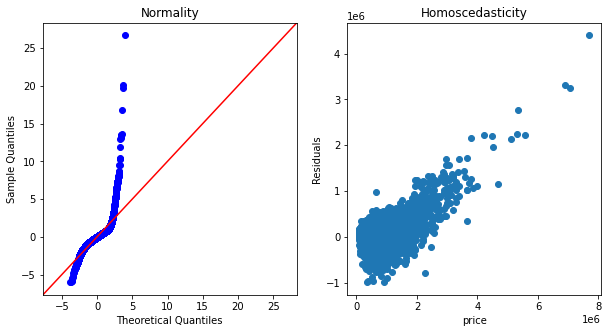

In [19]:
#Seperate the outcome variable (price) and the predictors and creates a regression model 
outcome = "price"
x_cols = list(data.columns)
x_cols.remove(outcome)

create_regression_and_check_assumptions(x_cols, outcome, data)

In [20]:
#Check how bad the multicollinearity is
calc_variance_inflation_factor(data, x_cols)         
#It appears some of our variables are highly correlated

('bedrooms', 4373805.613952642)
('sqft_lot', 16.855606844316338)
('zipcode', 16.53455877815649)


# Refining the Model

In [21]:
#from https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
#Eliminate extereme values that are more than 1.5 times the interquartile range larger than the third 
#quartile or less than 1.5 times the interquartile range lower than the first quartile
Q1 = qual_predictors.quantile(0.25)
Q3 = qual_predictors.quantile(0.75)
IQR = Q3 - Q1

#Get the indices where the outliers are
outlier_indices = ((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)

#Create a new, cleaned dataset
cleaned_data = data[~outlier_indices]
display(cleaned_data.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,month_sold,house_age,renovated,has_basement
0,221900.000,3,1.000,1180,5650,1.000,0.000,3,7,1180,98178,1340,5650,10,59,0,0
1,538000.000,3,2.250,2570,7242,2.000,0.000,3,7,2170,98125,1690,7639,12,63,1,1
2,180000.000,2,1.000,770,10000,1.000,0.000,3,6,770,98028,2720,8062,2,82,0,0
3,604000.000,4,3.000,1960,5000,1.000,0.000,5,7,1050,98136,1360,5000,12,49,0,1
4,510000.000,3,2.000,1680,8080,1.000,0.000,3,8,1680,98074,1800,7503,2,28,0,0


In [72]:
#Look at the new range of prices our model is good for now that we have cleaned the data 
cleaned_data["price"].describe().loc[["min", "max"]]

min     82000.000
max   2400000.000
Name: price, dtype: float64

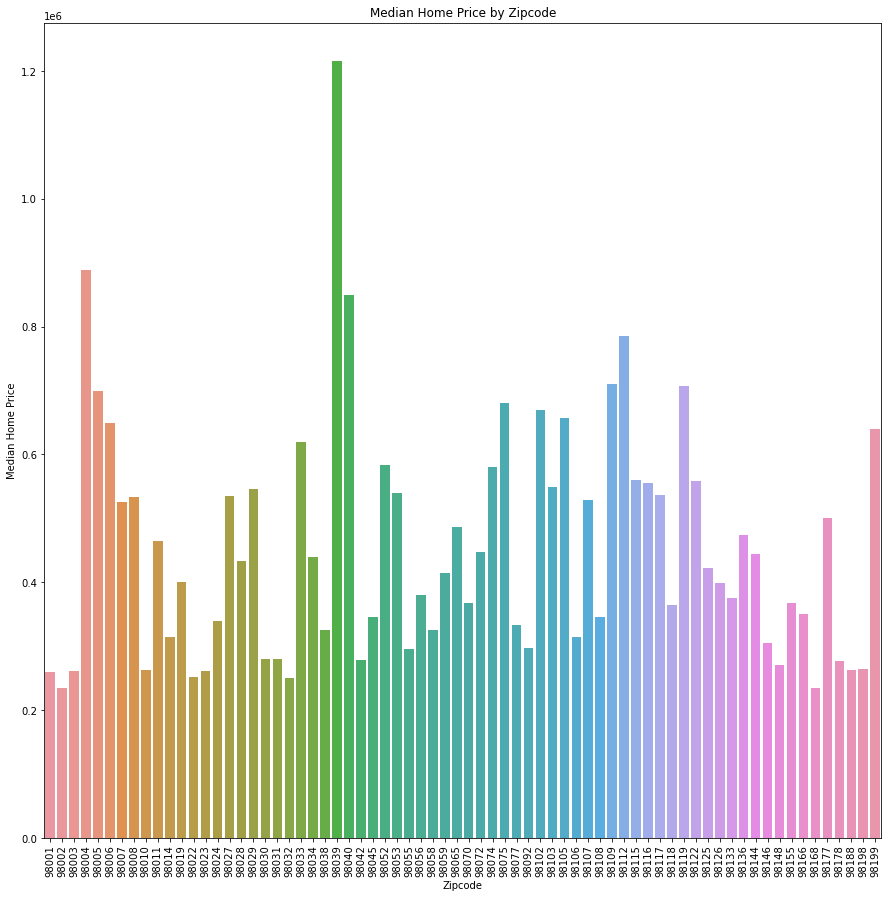

In [74]:
#Looking at the relationship between zipcode and median price, we can see the importance of 
#location in house price
zipcode_med_df = cleaned_data.groupby(["zipcode"])["price"].median().to_frame()
zipcode_med_df = zipcode_med_df.reset_index()
fig, ax = plt.subplots(figsize=(15,15))
g = sns.barplot(x="zipcode", y="price", data=zipcode_med_df, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
ax.set(xlabel="Zipcode", ylabel="Median Home Price", title="Median Home Price by Zipcode");

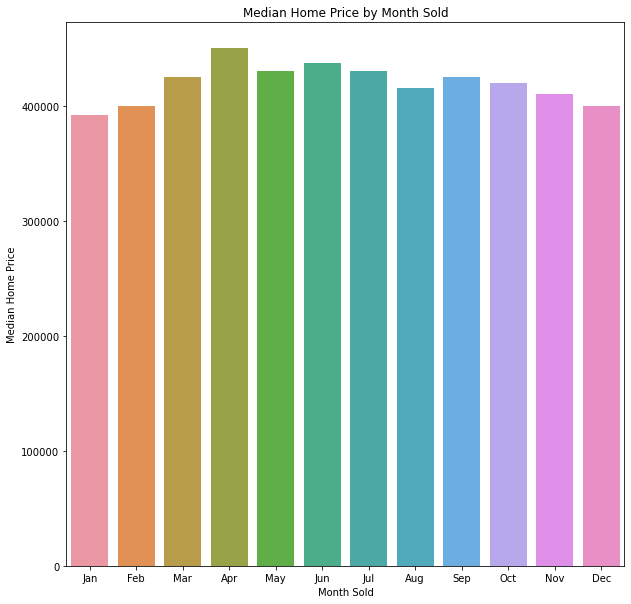

In [75]:
#See if median home price differs by month
month_med_df = cleaned_data.groupby(["month_sold"])["price"].median().to_frame()
month_med_df = month_med_df.reset_index()
#make months into their abbreviation, from 
#https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
month_med_df["month_sold"] = month_med_df["month_sold"].apply(lambda x: calendar.month_abbr[x])
fig, ax = plt.subplots(figsize=(10,10))
g = sns.barplot(x="month_sold", y="price", data=month_med_df, ax=ax)
ax.set(xlabel="Month Sold", ylabel="Median Home Price", title="Median Home Price by Month Sold");
#It does not appear so, but our inital equation will confirm 

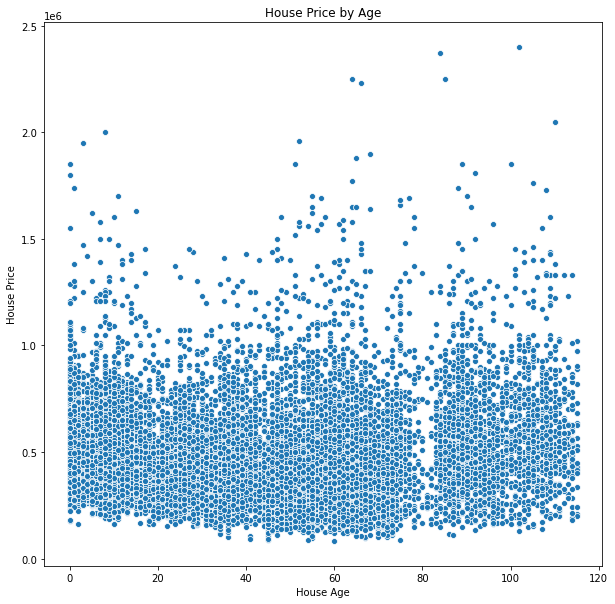

In [78]:
#Look at house age vs price on its own
#It seems unlikely that house age will have a strong relationship with price
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="house_age", y="price", data=cleaned_data);
ax.set(xlabel="House Age", ylabel="House Price", title="House Price by Age");

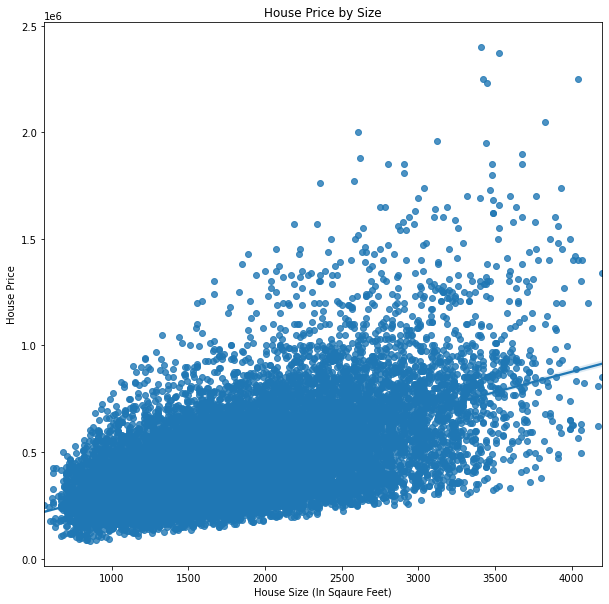

In [82]:
#Look at sqft_living vs price on its own
#As we can see as size increases, so does price
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x="sqft_living", y="price", data=cleaned_data);
ax.set(xlabel="House Size (In Sqaure Feet)", ylabel="House Price", title="House Price by Size");

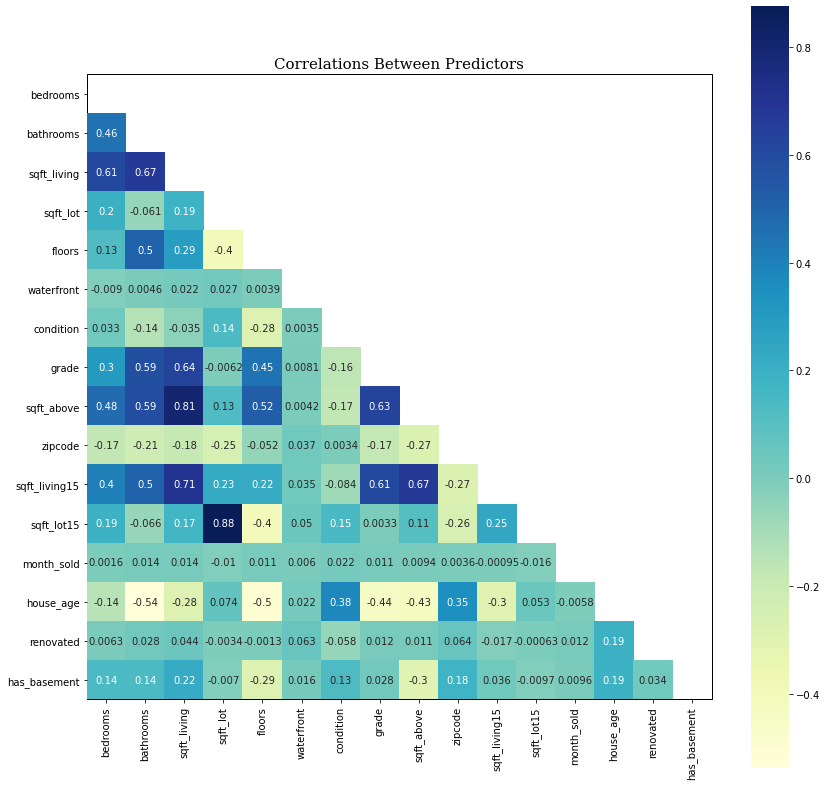

In [23]:
#Look at the correlations between the preditors 
predictors = cleaned_data.copy()
predictors = predictors.drop(columns=["price"])
create_heatmap(predictors)
#There are still some high correlations

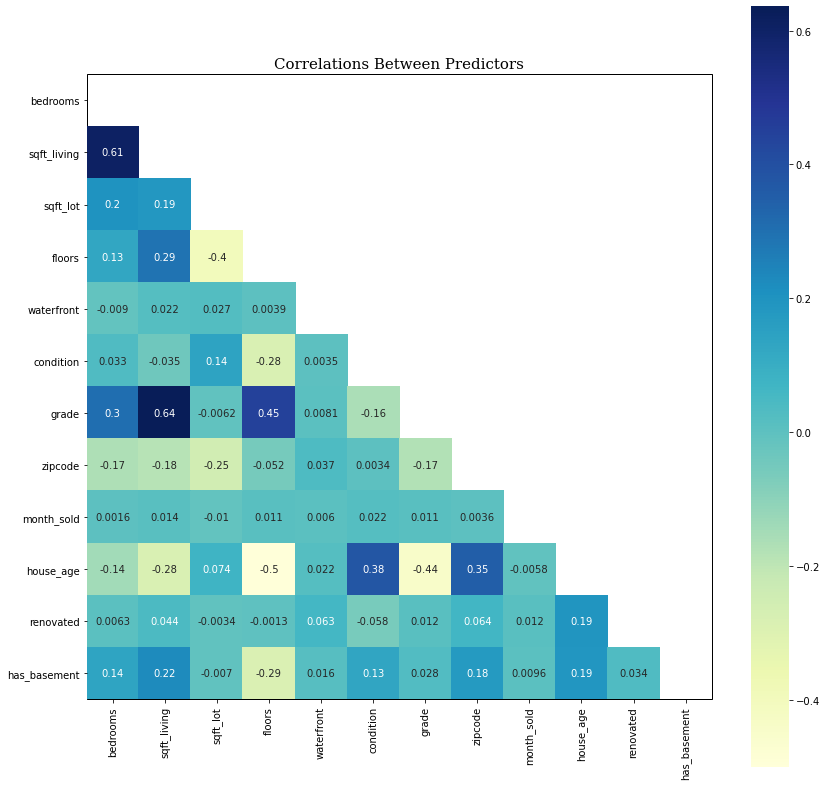

In [24]:
#Since sqft_living15 is highly correlated with multiple variables and is not specific to the house,
#it can be dropped. Similarly, we can drop sqft_lot15. Both these factors 
#cannot be controlled by the buyer or seller, so they provide limited use.
#The data provided by sqft_above is captured in the
#total and whether or not there is a basement, so it can be dropped
#Bathrooms has a high correlation with other variables so dropping it can strengthen the model 
predictors = predictors.drop(columns=["sqft_living15", "sqft_above", "sqft_lot15", "bathrooms"])
create_heatmap(predictors)

## What variables should be dropped from the model?

In [25]:
#Now that the correlations are low enough, we can get rid of the discarded variables
cleaned_data = cleaned_data.drop(columns=["sqft_living15", "sqft_above", "sqft_lot15", "bathrooms"])

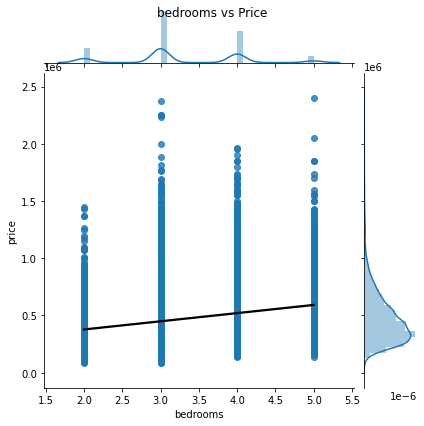

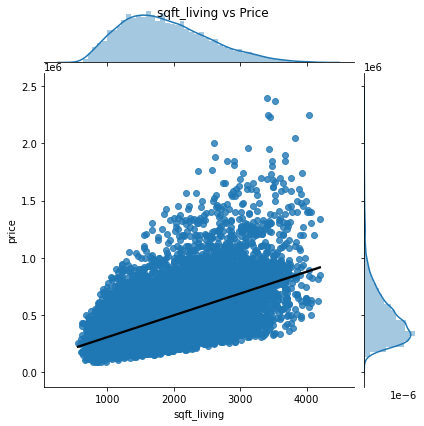

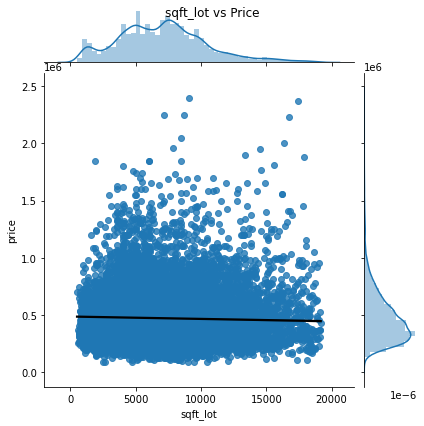

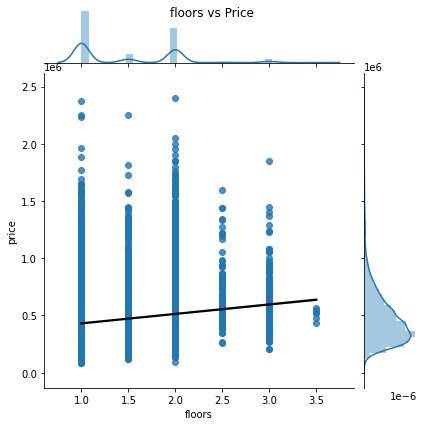

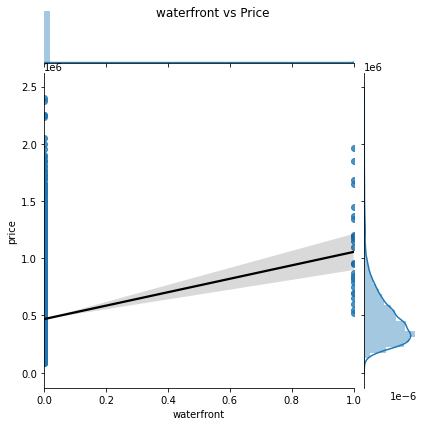

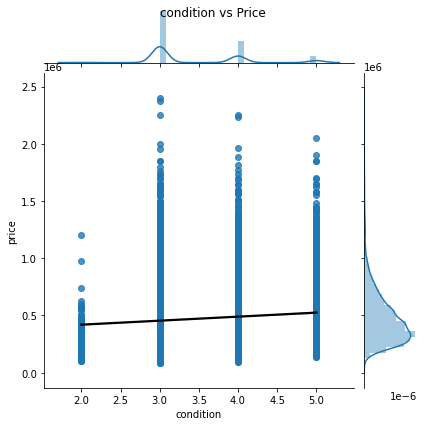

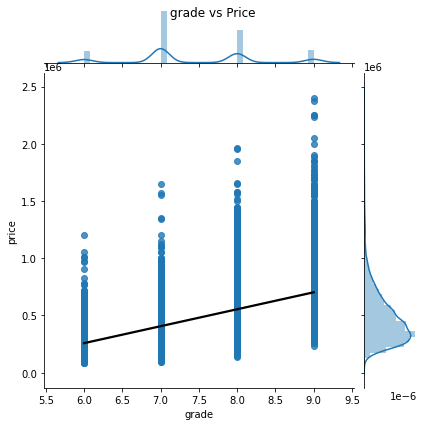

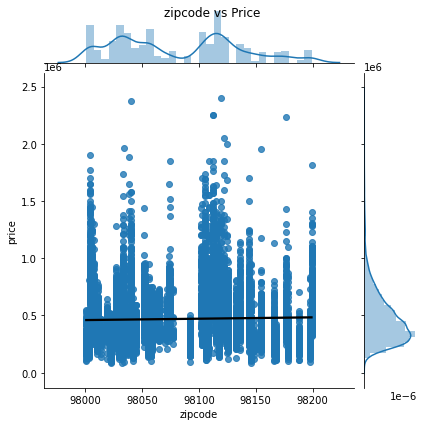

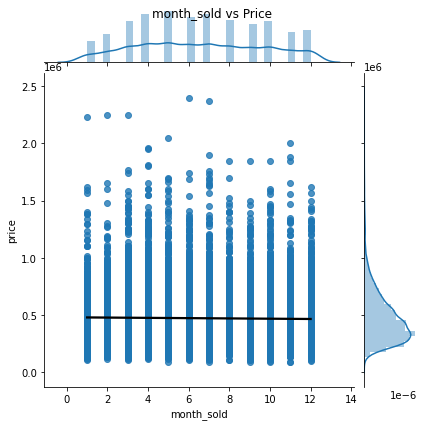

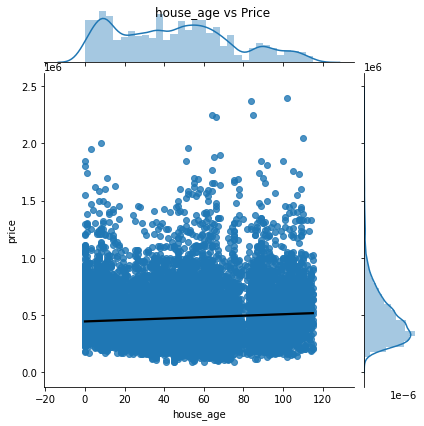

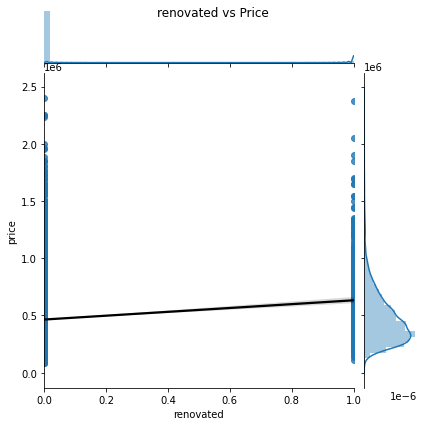

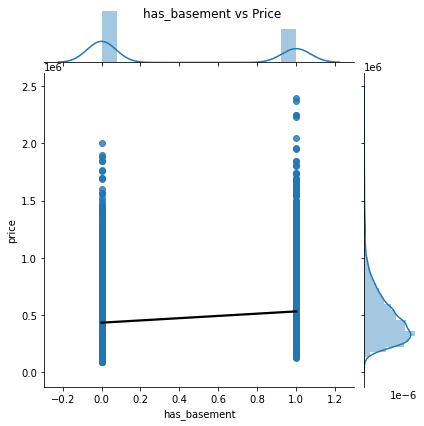

In [26]:
#Check the linearity of our new data
for col in predictors.columns:
    g = sns.jointplot(col, "price", data=cleaned_data, kind="reg", line_kws = {"color": 'black'})
    g.fig.suptitle(f"{col} vs Price")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     804.6
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:50:11   Log-Likelihood:            -2.1590e+05
No. Observations:               16668   AIC:                         4.320e+05
Df Residuals:                   16588   BIC:                         4.326e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.382e+05   1.33e+04    -40.553      0.000   -5.64e+05   -5.12e+05
C(waterfront)[T.1.0]  5.449e+05      2e+04     27.215      0.000    5.06e+05    5.84e+05
C(zipcode)[T.98002]    1.48e+04   9933.675      1.490      0.136   -4666.384    3.43e+04
C(zipcode)[T.98003]   3490.3819   8998.433      0.388      0.698   -1.41e+04    2.11e+04
C(zipcode)[T.98004]   5.956e+05      1e+04     59.317      0.000    5.76e+05    6.15e+05
C(zipcode)[T.98005]   3.154e+05   1.16e+04     27.288      0.000    2.93e+05    3.38e+05
C(zipcode)[T.98006]   2.661e+05   8586.485     30.995      0.000    2.49e+05    2.83e+05
C(zipcode)[T.98007]   2.328e+05   1.15e+04     20.226      0.000     2.1e+05    2.55e+05
C(zipcode)[T.98008]    2.43e+05   9056.553     26.837      0.000    2.25e+05    2.61e+05
C(zipcode)[T.98010]   7.918e+04   1.75e+04      4.513      0.000    4.48e+04    1.14e+05
C(zipcode)[T.98011]   1.421e+05   1.01e+04     14.134      0.000    1.22e+05    1.62e+05
C(zipcode)[T.98014]   9.444e+04   1.84e+04      5.128      0.000    5.83e+04    1.31e+05
C(zipcode)[T.98019]   9.948e+04   1.09e+04      9.167      0.000    7.82e+04    1.21e+05
C(zipcode)[T.98022]   1.116e+04   1.07e+04      1.041      0.298   -9859.106    3.22e+04
C(zipcode)[T.98023]   -1.63e+04   7900.396     -2.063      0.039   -3.18e+04    -816.646
C(zipcode)[T.98024]   1.276e+05   2.32e+04      5.497      0.000    8.21e+04    1.73e+05
C(zipcode)[T.98027]   2.339e+05   9617.031     24.325      0.000    2.15e+05    2.53e+05
C(zipcode)[T.98028]   1.291e+05   9089.712     14.208      0.000    1.11e+05    1.47e+05
C(zipcode)[T.98029]   2.319e+05   8929.571     25.965      0.000    2.14e+05    2.49e+05
C(zipcode)[T.98030]   8791.9560   9128.014      0.963      0.335   -9099.929    2.67e+04
C(zipcode)[T.98031]   1.317e+04   9049.688      1.456      0.146   -4565.613    3.09e+04
C(zipcode)[T.98032]  -8938.0417   1.17e+04     -0.762      0.446   -3.19e+04     1.4e+04
C(zipcode)[T.98033]    3.27e+05   8424.866     38.809      0.000     3.1e+05    3.43e+05
C(zipcode)[T.98034]   1.912e+05   7766.128     24.614      0.000    1.76e+05    2.06e+05
C(zipcode)[T.98038]    4.61e+04   7818.091      5.897      0.000    3.08e+04    6.14e+04
C(zipcode)[T.98039]   8.095e+05   2.81e+04     28.808      0.000    7.54e+05    8.65e+05
C(zipcode)[T.98040]   4.683e+05   1.05e+04     44.479      0.000    4.48e+05    4.89e+05
C(zipcode)[T.98042]    1.67e+04   7924.060      2.107      0.035    1167.258    3.22e+04
C(zipcode)[T.98045]   1.002e+05   1.08e+04      9.237      0.000    7.89e+04    1.21e+05
C(zipcode)[T.98052]   2.496e+05   7834.911     31.854      0.000    2.34e+05    2.65e+05
C(zipcode)[T.98053]   2.616e+05   9529.220     27.456      0.000    2.43e+05     2.8e+05
C(zipcode)[T.98055]   4.417e+04   9262.222      4.769    

The residuals are not normally distributed, p = 0.0.
The model is heteroskedastic, p = 0.0.


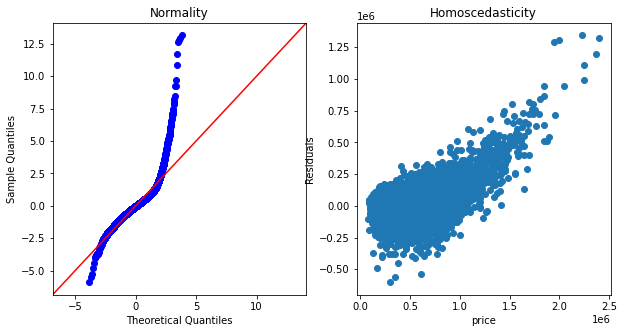

In [27]:
#Create a new model with the cleaned data
x_cols_2 = list(cleaned_data.columns)
x_cols_2.remove(outcome)
#This variable has been shown to have high p-values so we can get rid of it
x_cols_2.remove("month_sold")
create_regression_and_check_assumptions(x_cols_2, outcome, cleaned_data)
#The assumptions are still violated

## How should we deal with contradictions between VIF and visual inspection of correlations?

('bedrooms', 4314568.761389395)


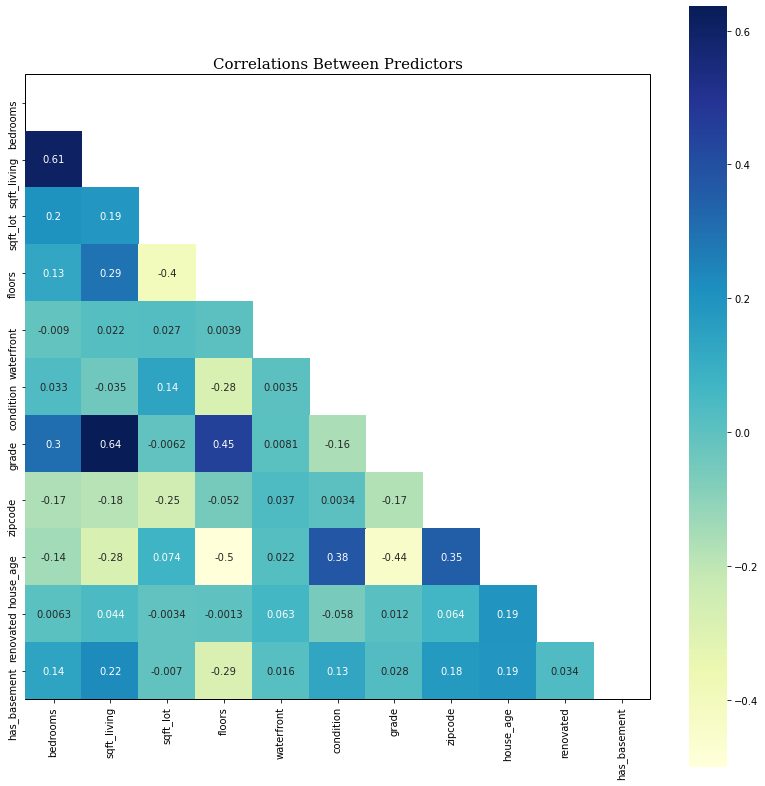

In [28]:
#Check how bad the multicollinearity is
calc_variance_inflation_factor(cleaned_data, x_cols_2)         
#It appears some of our variables are still highly correlated
create_heatmap(cleaned_data[x_cols_2])
#However this does not correspond to what is shown in the heatmap so we disregard the suggestion
#to drop the variable 

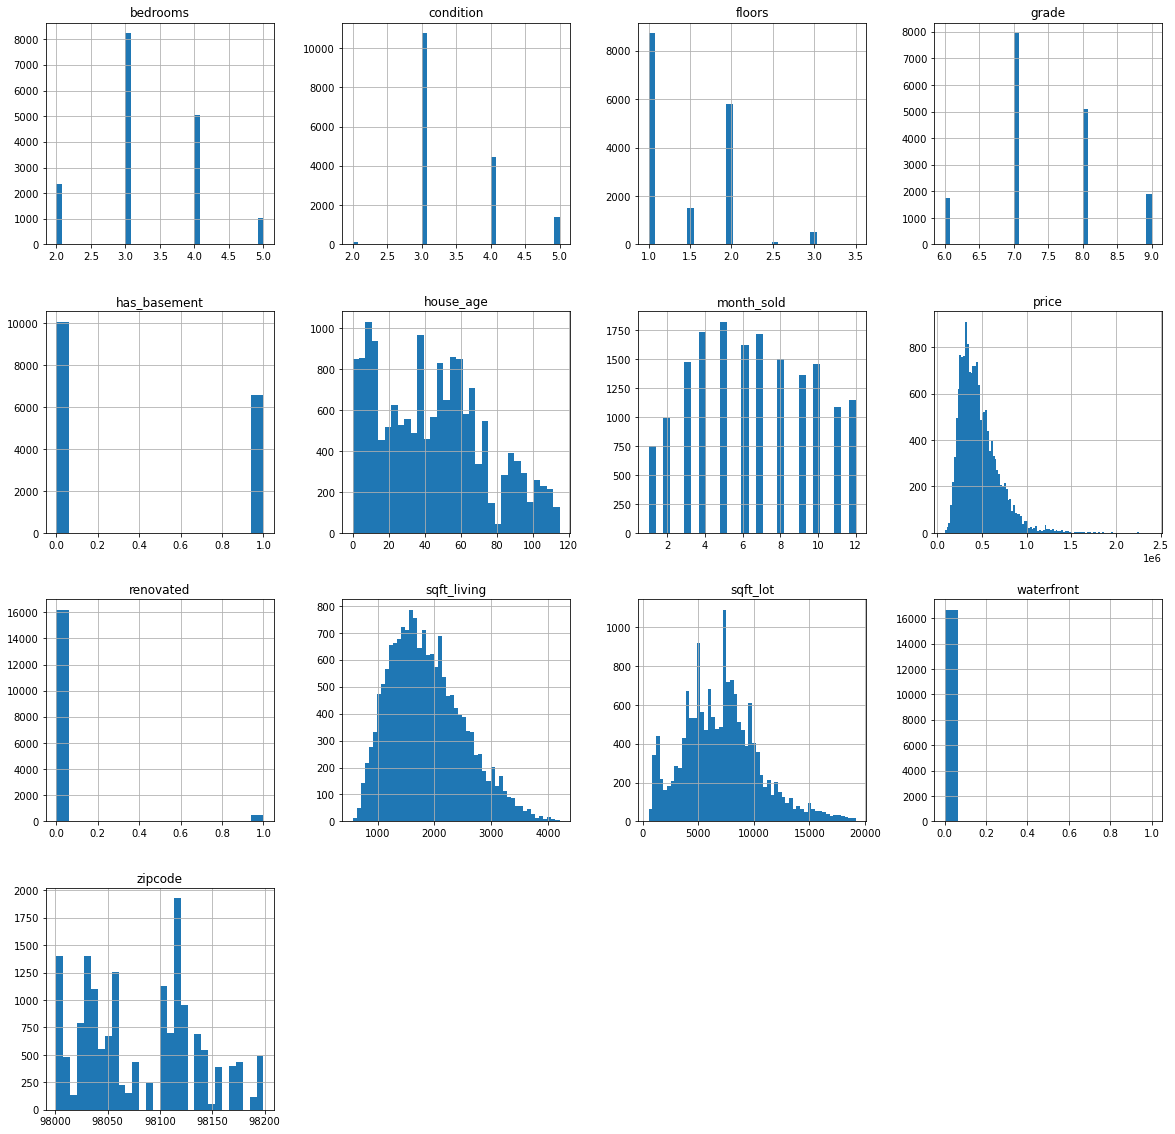

In [29]:
#Look at the distributions for the cleaned dataset
cleaned_data.hist(figsize=(20,20), bins="auto");
#While a few of the distributions have gotten more normal, many still are not

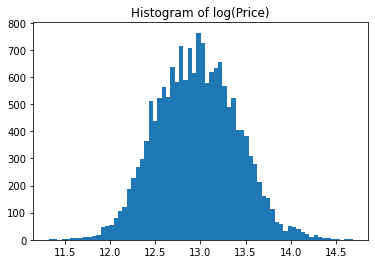

In [30]:
#transform the price data given its abnormal shape and the failure of our model to meet
#the assumptions 
cleaned_data["log_price"] = np.log(cleaned_data["price"])

#This histogram is far more normal 
plt.hist(cleaned_data["log_price"], bins="auto");
plt.title("Histogram of log(Price)");

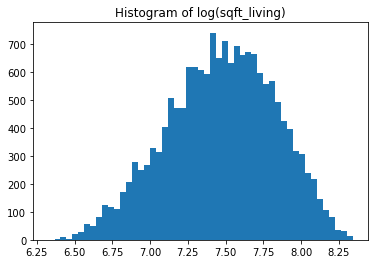

In [31]:
#log transform the sqft_living column as well
cleaned_data["log_sqft_living"] = np.log(cleaned_data["sqft_living"])
plt.hist(cleaned_data["log_sqft_living"], bins="auto");
plt.title("Histogram of log(sqft_living)");
#log transformation of other vairables did not make their distributions more normal or improve model assumptions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:50:19   Log-Likelihood:                 5302.8
No. Observations:               16668   AIC:                        -1.045e+04
Df Residuals:                   16588   BIC:                            -9828.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.4724      0.041    181.090      0.000       7.392       7.553
C(waterfront)[T.1.0]     0.7881      0.035     22.838      0.000       0.720       0.856
C(zipcode)[T.98002]     -0.0099      0.017     -0.579      0.563      -0.043       0.024
C(zipcode)[T.98003]      0.0248      0.016      1.600      0.110      -0.006       0.055
C(zipcode)[T.98004]      1.1127      0.017     64.307      0.000       1.079       1.147
C(zipcode)[T.98005]      0.7571      0.020     38.013      0.000       0.718       0.796
C(zipcode)[T.98006]      0.6638      0.015     44.847      0.000       0.635       0.693
C(zipcode)[T.98007]      0.6349      0.020     32.003      0.000       0.596       0.674
C(zipcode)[T.98008]      0.6537      0.016     41.885      0.000       0.623       0.684
C(zipcode)[T.98010]      0.1912      0.030      6.326      0.000       0.132       0.251
C(zipcode)[T.98011]      0.4651      0.017     26.852      0.000       0.431       0.499
C(zipcode)[T.98014]      0.2718      0.032      8.564      0.000       0.210       0.334
C(zipcode)[T.98019]      0.3499      0.019     18.714      0.000       0.313       0.387
C(zipcode)[T.98022]      0.0331      0.018      1.790      0.074      -0.003       0.069
C(zipcode)[T.98023]     -0.0280      0.014     -2.056      0.040      -0.055      -0.001
C(zipcode)[T.98024]      0.3969      0.040      9.924      0.000       0.319       0.475
C(zipcode)[T.98027]      0.6222      0.017     37.537      0.000       0.590       0.655
C(zipcode)[T.98028]      0.4246      0.016     27.107      0.000       0.394       0.455
C(zipcode)[T.98029]      0.6203      0.015     40.311      0.000       0.590       0.650
C(zipcode)[T.98030]      0.0559      0.016      3.551      0.000       0.025       0.087
C(zipcode)[T.98031]      0.0741      0.016      4.753      0.000       0.044       0.105
C(zipcode)[T.98032]     -0.0290      0.020     -1.434      0.152      -0.069       0.011
C(zipcode)[T.98033]      0.7788      0.015     53.640      0.000       0.750       0.807
C(zipcode)[T.98034]      0.5421      0.013     40.505      0.000       0.516       0.568
C(zipcode)[T.98038]      0.1799      0.013     13.352      0.000       0.153       0.206
C(zipcode)[T.98039]      1.2888      0.048     26.614      0.000       1.194       1.384
C(zipcode)[T.98040]      0.9274      0.018     51.108      0.000       0.892       0.963
C(zipcode)[T.98042]      0.0669      0.014      4.900      0.000       0.040       0.094
C(zipcode)[T.98045]      0.3217      0.019     17.204      0.000       0.285       0.358
C(zipcode)[T.98052]      0.6568      0.014     48.650      0.000       0.630       0.683
C(zipcode)[T.98053]      0.6740      0.016     41.034      0.000       0.642       0.706
C(zipcode)[T.98055]      0.1514      0.016      9.487    

The residuals are not normally distributed, p = 6.684347449192313e-229.
The model is heteroskedastic, p = 0.0.


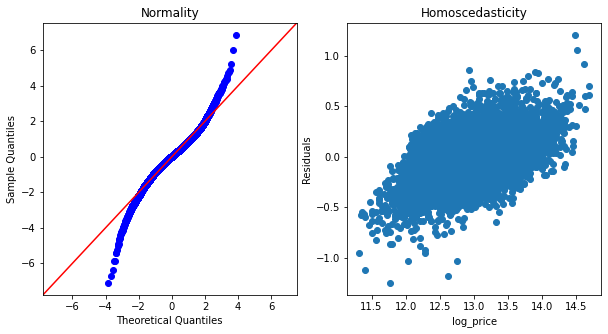

In [32]:
#Try a new model with the transformed data
outcome = "log_price"
x_cols_3 = x_cols_2.copy()
x_cols_3.append("log_sqft_living")
x_cols_3.remove("sqft_living")
model = create_regression_and_check_assumptions(x_cols_3, outcome, cleaned_data)

In [33]:
#Look at the coefficients generated from this model to understand what this model mean 
coefficients = model.params.sort_values(ascending=False).to_frame(name="Coefficients")
display(coefficients)

,Coefficients
Intercept,7.472
C(zipcode)[T.98039],1.289
C(zipcode)[T.98004],1.113
C(zipcode)[T.98112],1.016
C(zipcode)[T.98109],0.992
C(zipcode)[T.98119],0.992
C(zipcode)[T.98105],0.954
C(zipcode)[T.98102],0.948
C(zipcode)[T.98040],0.927
C(zipcode)[T.98199],0.873


So what does this mean?
- If we change the square footage of the home by one percent, we would expect price to increase by 0.712 percent. 
- If we change the grade by one level, we would expect price to increase by 12.1 percent. 
- If the house has been renovated, we would expect price to increase by 5.9 percent.

In [34]:
df_train, df_test = train_test_split(cleaned_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     843.3
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:50:21   Log-Likelihood:                 3983.2
No. Observations:               12501   AIC:                            -7806.
Df Residuals:                   12421   BIC:                            -7212.
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.5092      0.048    157.817      0.000       7.416       7.603
C(waterfront)[T.1.0]     0.7790      0.040     19.355      0.000       0.700       0.858
C(zipcode)[T.98002]     -0.0171      0.020     -0.868      0.386      -0.056       0.022
C(zipcode)[T.98003]      0.0301      0.018      1.688      0.091      -0.005       0.065
C(zipcode)[T.98004]      1.1102      0.020     55.969      0.000       1.071       1.149
C(zipcode)[T.98005]      0.7517      0.023     32.860      0.000       0.707       0.797
C(zipcode)[T.98006]      0.6525      0.017     38.270      0.000       0.619       0.686
C(zipcode)[T.98007]      0.6350      0.022     28.799      0.000       0.592       0.678
C(zipcode)[T.98008]      0.6496      0.018     36.134      0.000       0.614       0.685
C(zipcode)[T.98010]      0.2068      0.036      5.818      0.000       0.137       0.276
C(zipcode)[T.98011]      0.4620      0.020     23.279      0.000       0.423       0.501
C(zipcode)[T.98014]      0.2494      0.039      6.416      0.000       0.173       0.326
C(zipcode)[T.98019]      0.3522      0.021     16.525      0.000       0.310       0.394
C(zipcode)[T.98022]      0.0355      0.022      1.648      0.099      -0.007       0.078
C(zipcode)[T.98023]     -0.0326      0.016     -2.081      0.037      -0.063      -0.002
C(zipcode)[T.98024]      0.3849      0.046      8.397      0.000       0.295       0.475
C(zipcode)[T.98027]      0.6184      0.019     32.990      0.000       0.582       0.655
C(zipcode)[T.98028]      0.4276      0.018     23.551      0.000       0.392       0.463
C(zipcode)[T.98029]      0.6169      0.018     34.424      0.000       0.582       0.652
C(zipcode)[T.98030]      0.0519      0.018      2.816      0.005       0.016       0.088
C(zipcode)[T.98031]      0.0729      0.018      4.070      0.000       0.038       0.108
C(zipcode)[T.98032]     -0.0247      0.023     -1.080      0.280      -0.069       0.020
C(zipcode)[T.98033]      0.7873      0.017     46.907      0.000       0.754       0.820
C(zipcode)[T.98034]      0.5367      0.015     34.914      0.000       0.507       0.567
C(zipcode)[T.98038]      0.1824      0.016     11.725      0.000       0.152       0.213
C(zipcode)[T.98039]      1.2795      0.057     22.353      0.000       1.167       1.392
C(zipcode)[T.98040]      0.9297      0.021     43.887      0.000       0.888       0.971
C(zipcode)[T.98042]      0.0613      0.016      3.904      0.000       0.031       0.092
C(zipcode)[T.98045]      0.3210      0.021     15.021      0.000       0.279       0.363
C(zipcode)[T.98052]      0.6531      0.015     42.418      0.000       0.623       0.683
C(zipcode)[T.98053]      0.6678      0.019     35.340      0.000       0.631       0.705
C(zipcode)[T.98055]      0.1480      0.018      8.044    

The residuals are not normally distributed, p = 5.770462574276064e-165.
The model is heteroskedastic, p = 0.0.


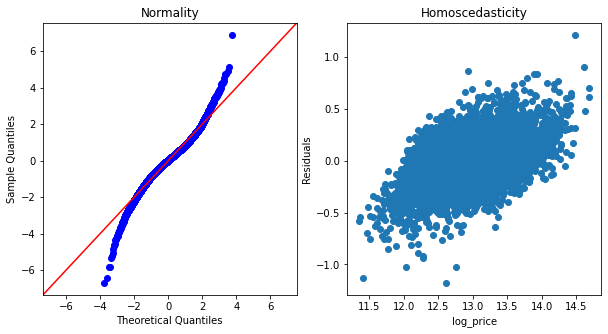

In [35]:
model_train = create_regression_and_check_assumptions(x_cols_3, outcome, df_train)

In [36]:
y_train_pred = model_train.predict(df_train)
y_test_pred = model_train.predict(df_test)

In [37]:
r2_train = r2_score(df_train["log_price"],y_train_pred )
r2_test = r2_score(df_test["log_price"],y_test_pred )

print(f"Training Score: {r2_train}")
print(f"Test Score: {r2_test}")

Training Score: 0.8428572358105657
Test Score: 0.8437362835851802


# Conclusion

It is possible that linear regression is not the most appropriate way to predict house price from the given variables. While this model does have a relatively high r-squared, the assumptions of linear regressions are not met and many of the coefficients are very small. This model dropped the information about the size of surrounding houses, number of bathrooms, month sold, and the size of the house excluding the basement. The most important features include zipcode, square footage of the house, and the grade given by King's County.   